<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analysez les ventes d'une librairie avec R ou Python
</h2>
</div>

# Contenu du projet 

Ce projet s'inscrit dans le secteur de librairie en ligne. L'objectif est de **fournir des résultats impactants** afin de guider Annabelle, responsable Marketing chez Lapage. Je présenterai différents indicateurs et graphiques autour du chiffre d'affaires, regarderai l'évolution dans le temps et présenterai une moyenne mobile pour évaluer la tendance globale, avec un zoom sur les références voir un peu les tops et les flops, la répartition par catégorie, des informations sur les profils de nos clients et également la répartition du chiffre d'affaires entre eux, via une courbe de Lorenz.

Pour cette mission, on me demande également de déterminer 5 corrélations :

- [Entre le genre client et la catégorie des livres achetés](#A.-Entre-genre-du-client-et-la-catégorie-des-livres-achetés)
- [Entre l'âge des clients et le montant total des achats.](#B.-Lien-entre-age-du-client-et-montant-total-des-achats)
- [Entre l'âge des clients et la fréquence d'achat.](#c.-Entre-age-du-client-et-fréquence-achat)
- [Entre l'âge des clients et la taille du panier moyen.](#D.-Entre-age-du-client-et-taille-du-panier-moyen)
- [Entre  l'âge des clients et les catégories des livres achetés.](#E.-Entre-age-du-client-et-catégories-des-livres-achetés)

Pour ce faire j'ai à disposition 3 fichiers issus de la base de données LAPAGE: un fichier clients, un fichier produits et un fichier transactions. Nous explorerons les données pour n'extraire que les données utiles dans un nouveau df que nous analyserons visuellement et statistiquement. 

# Partie 1: Importations et Exploration des données

### A. Importations

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency,pearsonr
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Importations des fichiers avec Pandas
df_customers = pd.read_csv("C:\p6\BDD\BDD\customers.csv", sep=';')
df_products = pd.read_csv("C:\p6\BDD\BDD\products.csv", sep=';')
df_transactions = pd.read_csv("C:\p6\BDD\BDD\Transactions.csv", sep=';')

In [3]:
# Vérifier les imports en affichant leur distribution
df_customers.shape

(8621, 3)

In [4]:
df_products.shape

(3286, 3)

In [5]:
df_transactions.shape

(687534, 4)

### B. Exploration des données

In [6]:
# Afficher le nombre de lignes dupliquées pour les colonnes 'client_id', 'sex' et 'birth'
display(df_customers.head(3) ,df_customers.isnull().sum() , df_customers.describe(include='all') , df_customers.dtypes , 
        df_customers[['client_id', 'sex', 'birth']].duplicated().sum())

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984


client_id    0
sex          0
birth        0
dtype: int64

,client_id,sex,birth
count,8621,8621,8621.000000
unique,8621,2,NaN
top,c_4410,f,NaN
freq,1,4490,NaN
mean,NaN,NaN,1978.275606
std,NaN,NaN,16.917958
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


client_id    object
sex          object
birth         int64
dtype: object

0

In [7]:
# Afficher le nombre de lignes dupliquées pour les colonnes 'id_prod', 'categ' et 'price'
display(df_products.head(3) ,df_products.isnull().sum() , df_products.describe(include='all') , df_products.dtypes , df_products[['id_prod','categ','price']].duplicated().sum())

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0


id_prod    0
price      0
categ      0
dtype: int64

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


id_prod     object
price      float64
categ        int64
dtype: object

0

In [8]:
# Afficher le nombre de lignes dupliquées pour les colonnes 'id_prod','date','id_prod','client_id'.
display(df_transactions.head(3) , df_transactions.isnull().sum(), df_transactions.describe(include='all'), 
        df_transactions.dtypes, df_transactions[['id_prod','date','id_prod','client_id']].duplicated().sum())

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-06 21:29:59.752585,s_118668,c_1609
freq,2340,2,14,25586


id_prod       object
date          object
session_id    object
client_id     object
dtype: object

0

In [9]:
#recodage de la colonne 'date'
list_date= []
for i in df_transactions['date']:
    i=i.split(' ')
    list_date.append(i[0])
df_transactions['date_adj']=list_date

In [10]:
#Supprimer la colonne inutile pour notre analyse
df_transactions=df_transactions.drop('date',axis=1)

In [11]:
#Encodage colonne date
df_transactions = df_transactions.rename(columns={'date_adj': 'date'})
df_transactions

,id_prod,session_id,client_id,date
0,0_1259,s_1,c_329,2021-03-01
1,0_1390,s_2,c_664,2021-03-01
2,0_1352,s_3,c_580,2021-03-01
3,0_1458,s_4,c_7912,2021-03-01
4,0_1358,s_5,c_2033,2021-03-01
...,...,...,...,...
687529,1_508,s_348444,c_3573,2023-02-28
687530,2_37,s_348445,c_50,2023-02-28
687531,1_695,s_348446,c_488,2023-02-28
687532,0_1547,s_348447,c_4848,2023-02-28


In [12]:
#Afficher d'eventuels price negatifs
display(df_products.sort_values('price'))

,id_prod,price,categ
2271,0_528,0.62,0
2354,0_202,0.62,0
370,0_120,0.66,0
1210,0_1844,0.77,0
1529,0_1620,0.80,0
...,...,...,...
2778,2_30,233.54,2
1435,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [13]:
#Combien de clients dans df_customers
df_customers['client_id'].describe()

count       8621
unique      8621
top       c_4410
freq           1
Name: client_id, dtype: object

In [14]:
#Combien de clients dans df_transactions
df_transactions['client_id'].describe()

count     687534
unique      8600
top       c_1609
freq       25586
Name: client_id, dtype: object

In [15]:
#Combien de références dans df_transactions
df_transactions['id_prod'].describe()

count     687534
unique      3265
top        1_369
freq        2340
Name: id_prod, dtype: object

In [16]:
#Combien de références dans df_products
df_products['id_prod'].describe()

count       3286
unique      3286
top       0_1421
freq           1
Name: id_prod, dtype: object

In [17]:
# vérifier si toutes les valeurs de la colonne du df_products 'id_prod'.
def tester_unicite(df, col):
    res = df[col].nunique() == df.shape[0]
    return res
tester_unicite(df_products,'id_prod')

True

In [18]:
# vérifier si toutes les valeurs de la colonne'id_prod'.
def tester_unicite(df, col):
    res = df[col].nunique() == df.shape[0]
    return res
tester_unicite(df_customers,'client_id')

True

### C. Rapprochement des fichiers

In [19]:
#affichage des longueurs de dataframe pour faire les jointures.
print(len(df_products['id_prod'].unique()))
print(len(df_transactions['id_prod'].unique()))
print(len(df_transactions['client_id'].unique()))
print(len(df_customers['client_id'].unique()))

3286
3265
8600
8621


In [20]:
# Effectuer la jointure entre le fichier products et transactions
pt = pd.merge(df_products,df_transactions,on=['id_prod'],how='left',indicator=True)
display(pt.isna().sum())
pt.loc[pt['session_id'].isna()]

id_prod        0
price          0
categ          0
session_id    21
client_id     21
date          21
_merge         0
dtype: int64

,id_prod,price,categ,session_id,client_id,date,_merge
40239,0_1016,35.06,0,NaN,NaN,NaN,left_only
63699,0_1780,1.67,0,NaN,NaN,NaN,left_only
164799,0_1062,20.08,0,NaN,NaN,NaN,left_only
179776,0_1119,2.99,0,NaN,NaN,NaN,left_only
183506,0_1014,1.15,0,NaN,NaN,NaN,left_only
190426,1_0,31.82,1,NaN,NaN,NaN,left_only
233338,0_1318,20.92,0,NaN,NaN,NaN,left_only
256575,0_1800,22.05,0,NaN,NaN,NaN,left_only
293862,0_1645,2.99,0,NaN,NaN,NaN,left_only
324662,0_322,2.99,0,NaN,NaN,NaN,left_only


Entre la jointure des fichiers 'products' et 'transactions' on observe une différence de 21 références qui correspondent à des livres pas encore vendus je les excluerai de mon analyse.

In [21]:
# Effectuer la jointure PT entre le fichier 'products' et 'transactions'
pt = pd.merge(df_products,df_transactions,on=['id_prod'],how='inner',indicator=True)
display(pt.isna().sum())
pt.loc[pt['session_id'].isna()]

id_prod       0
price         0
categ         0
session_id    0
client_id     0
date          0
_merge        0
dtype: int64

,id_prod,price,categ,session_id,client_id,date,_merge


In [22]:
# Effectuer la jointure entre le fichier transactions et customers
tc = pd.merge(df_transactions,df_customers,on='client_id',how='right',indicator=True)
display(tc.isna().sum())
pasclient = tc.loc[tc['id_prod'].isna()]
pasclient

id_prod       21
session_id    21
client_id      0
date          21
sex            0
birth          0
_merge         0
dtype: int64

,id_prod,session_id,client_id,date,sex,birth,_merge
60134,NaN,NaN,c_8253,NaN,f,2001,right_only
202567,NaN,NaN,c_3789,NaN,f,1997,right_only
220670,NaN,NaN,c_4406,NaN,f,1998,right_only
222930,NaN,NaN,c_2706,NaN,f,1967,right_only
228157,NaN,NaN,c_3443,NaN,m,1959,right_only
251338,NaN,NaN,c_4447,NaN,m,1956,right_only
251898,NaN,NaN,c_3017,NaN,f,1992,right_only
264087,NaN,NaN,c_4086,NaN,f,1992,right_only
316669,NaN,NaN,c_6930,NaN,m,2004,right_only
323346,NaN,NaN,c_4358,NaN,m,1999,right_only


Entre les fichiers "transactions" et "customers", nous avons 21 lignes de valeurs nulles. Ce sont des clients enregistrés mais qui n'ont pas encore réalisé d'achat. Je ne les prendrai pas en considération pour la suite.

In [23]:
#Jointure PTC des trois fichiers à gauche du df_customers ainsi j'exclue les profils clients qui n'ont pas fait d'achat
ptc = pd.merge(pt,df_customers,on='client_id',how='left')

In [24]:
# Recodage colonne Calcul de l'âge
today = dt.date.today().year
ptc['age'] = today - ptc['birth']

# Diviser la date en plusieurs colonnes pour une utilisation future
ptc['date'] = pd.to_datetime(ptc['date'])
ptc['year'] = ptc['date'].dt.year
ptc['month'] = ptc['date'].dt.month
ptc['day'] = ptc['date'].dt.day
ptc['weekday'] = ptc['date'].dt.weekday

# Trier le DataFrame par date
ptc.sort_values(by='date', inplace=True)

# Remplacer les NaN par 0 dans la colonne "birth"
ptc['birth'].fillna(0, inplace=True)

# Convertir la colonne "birth" en type entier
ptc['birth'] = ptc['birth'].astype(int)

# Réorganiser le DataFrame pour faciliter la lecture
ptc = ptc[['id_prod', 'price', 'categ', 'day', 'month', 'year', 'weekday', 'date', 'session_id', 'client_id', 'sex', 'birth', 'age']]

# Afficher la jointure finale
ptc


,id_prod,price,categ,day,month,year,weekday,date,session_id,client_id,sex,birth,age
0,0_1421,19.99,0,1,3,2021,0,2021-03-01,s_101,c_8533,m,1972,51
382102,0_866,8.51,0,1,3,2021,0,2021-03-01,s_292,c_1876,m,1983,40
381827,1_508,21.92,1,1,3,2021,0,2021-03-01,s_196,c_3856,f,1972,51
640809,1_720,10.86,1,1,3,2021,0,2021-03-01,s_45,c_4500,f,1978,45
640810,1_720,10.86,1,1,3,2021,0,2021-03-01,s_236,c_2849,m,1989,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655478,2_163,68.99,2,28,2,2023,1,2023-02-28,s_348387,c_5217,f,2004,19
522905,2_110,62.25,2,28,2,2023,1,2023-02-28,s_348137,c_4958,m,1999,24
682767,0_1454,7.41,0,28,2,2023,1,2023-02-28,s_348073,c_5941,m,1951,72
475508,0_1426,13.44,0,28,2,2023,1,2023-02-28,s_348048,c_3892,f,1983,40


In [25]:
ptc.nunique()

id_prod         3265
price           1442
categ              3
day               31
month             12
year               3
weekday            7
date             730
session_id    345505
client_id       8600
sex                2
birth             76
age               76
dtype: int64

# Partie 2: Calculs et visualisation

### A. Chiffre d'affaires total

In [26]:
CAtotal = ptc['price'].sum()
print("Chiffre d'affaires total:", f'{CAtotal:,.2f}€')
ventetotal = len(ptc)
print('Ces deux dernières années nous avons', ventetotal, 'ventes')

Chiffre d'affaires total: 12,027,663.10€
Ces deux dernières années nous avons 687534 ventes


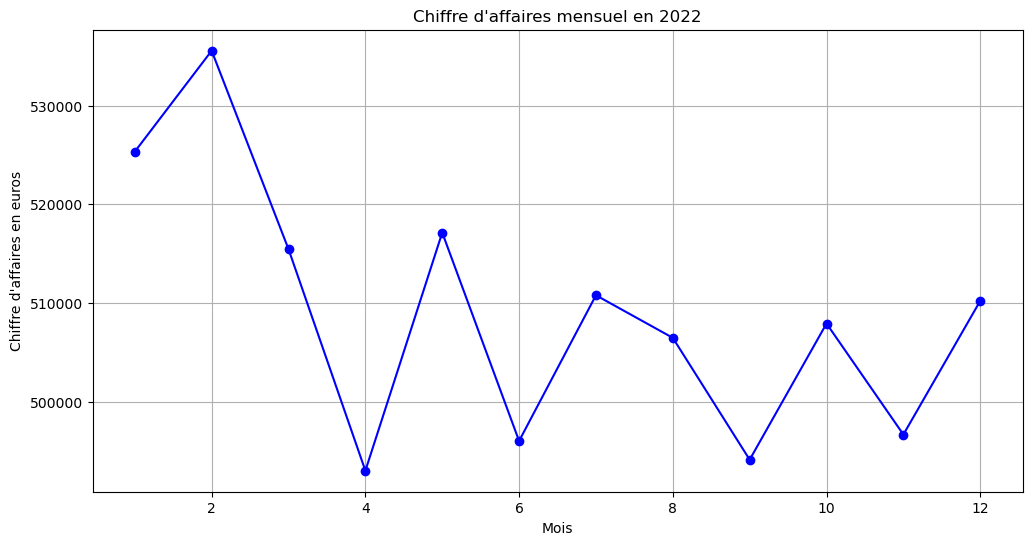

In [27]:
# Filtrer les données pour N l'année 2022
vente2022 = ptc[ptc['year'] == 2022]

# Calcul du chiffre d'affaires mensuel pour 2022
ca_mensuel_2022 = vente2022.groupby('month')['price'].sum()

# Créer le graphique
plt.figure(figsize=(12, 6))
ca_mensuel_2022.plot(kind='line', color='blue', marker='o')
plt.title("Chiffre d'affaires mensuel en 2022")
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires en euros')
plt.grid(True)
plt.show()


### B. Chiffres d'Affaire par catégories

En tout, nous avons 3265 produits.
Nous avons: 2292  produits dans la catégorie 0.0
Nous avons: 737  produits dans la catégorie 1.0
Nous avons: 236  produits dans la catégorie 2.0


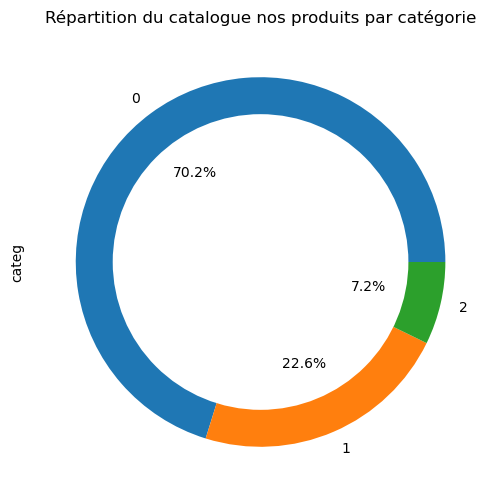

In [28]:
# Visualisation de notre catalogue 
cata = ptc[['id_prod','categ']].groupby('id_prod').value_counts().reset_index().rename(columns={0:'quantité'})
print('En tout, nous avons',len(cata),'produits.')
print('Nous avons:',len(cata.loc[cata['categ']==0]),' produits dans la catégorie 0.0')
print('Nous avons:',len(cata.loc[cata['categ']==1]),' produits dans la catégorie 1.0')
print('Nous avons:',len(cata.loc[cata['categ']==2]),' produits dans la catégorie 2.0')

cata_pie = cata['categ'].value_counts()
plt.figure(figsize=(6,6))
cata_pie.plot(kind='pie',autopct='%1.1f%%')
plt.title('Répartition du catalogue nos produits par catégorie')
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


,catégorie,quantité vendu
0,0,415459
1,1,235592
2,2,36483


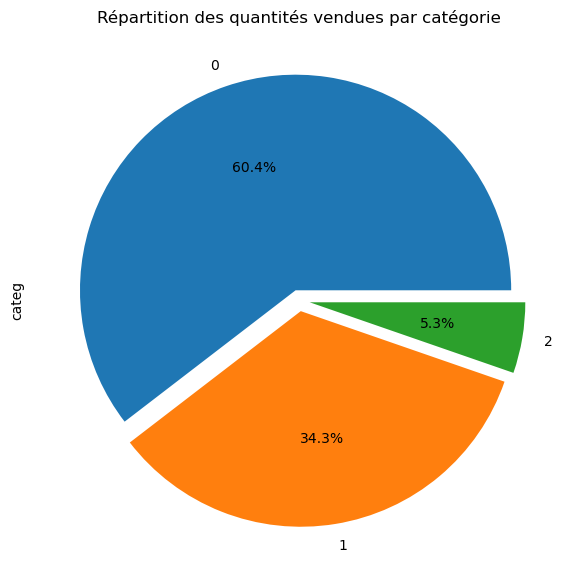

In [29]:
#Afficher la répartition des ventes en quantité par catégorie
display(ptc['categ'].value_counts().reset_index().rename(columns={'index':'catégorie','categ':'quantité vendu'}))
plt.figure(figsize=(7,7))
ptc["categ"].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05))
plt.title('Répartition des quantités vendues par catégorie')
plt.show()

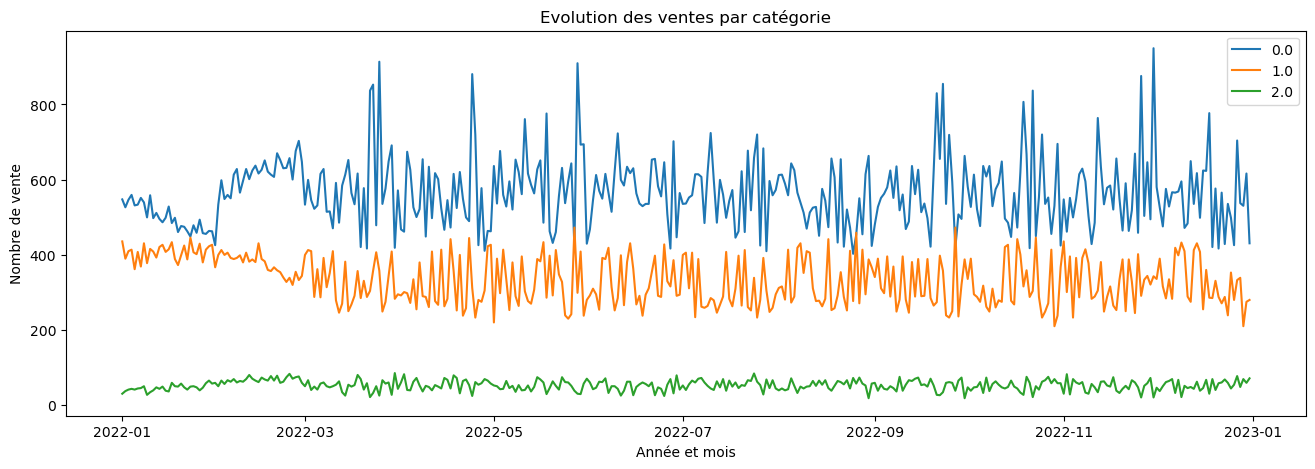

In [30]:
#Calcul du CA Total affichage par catégories
vente2022 = ptc.loc[ptc['year']==2022].groupby('date')['categ'].value_counts().unstack().reset_index()

plt.figure(figsize=(16,5))
plt.title("Evolution des ventes par catégorie")
plt.plot(vente2022['date'],vente2022[0.0],label='0.0')
plt.plot(vente2022['date'],vente2022[1.0],label='1.0')
plt.plot(vente2022['date'],vente2022[2.0],label='2.0')
plt.xlabel('Année et mois')
plt.ylabel('Nombre de vente')
plt.legend()
plt.show()

### C. Variabilité des prix

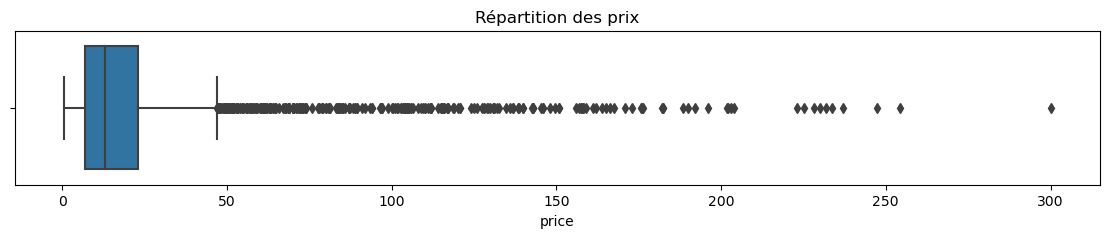

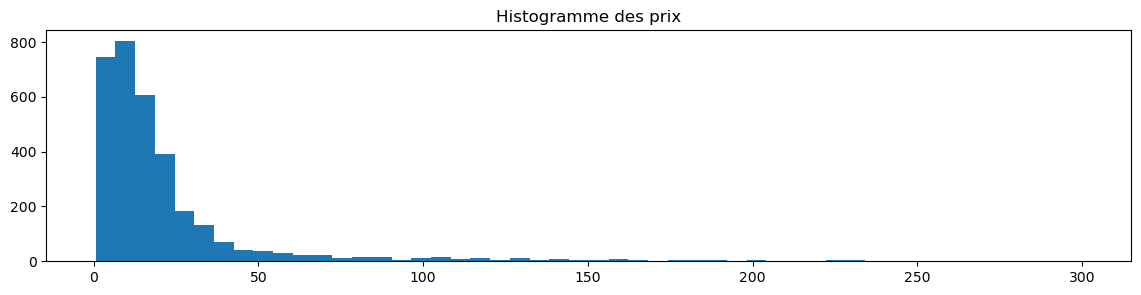

In [31]:
#On plot pour afficher la distribution des prix 
price = ptc[['id_prod','categ','price',]].drop_duplicates().sort_values('id_prod')
plt.figure(figsize=(14,2))
sns.boxplot(x=price['price'])
plt.title('Répartition des prix')
plt.show()
#Histogramme à 50 bins  
plt.figure(figsize=(14,3))
plt.hist(price['price'],bins=50)
plt.title('Histogramme des prix')
plt.show()

### D. Analyses du CA au fil du temps

In [32]:
 #'N-1' de mars 2021 à février 2022 pour avoir la meme dimension de comparaison
en_2021 = ptc.loc[(ptc['year'] == 2021) & (ptc['month'] >= 3) | (ptc['year'] == 2022) & (ptc['month'] <= 2)].groupby('month')['price'].sum().reset_index()
# 'N'de mars 2022 à février 2023
en_2022= ptc.loc[(ptc['year'] == 2022) & (ptc['month'] >= 3) | (ptc['year'] == 2023) & (ptc['month'] <= 2)].groupby('month')['price'].sum().reset_index()


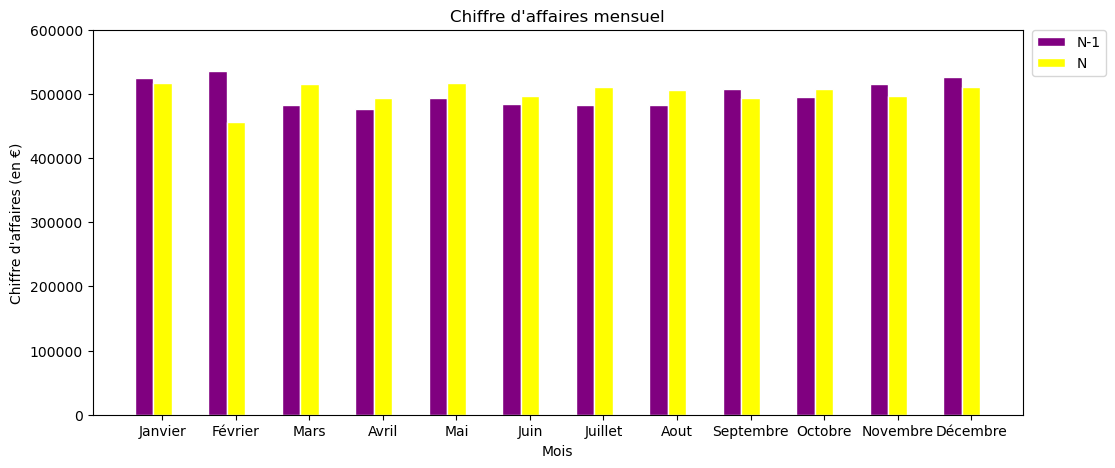

In [33]:
# Visualisation
plt.figure(figsize=(12, 5))
x = [1, 12]
y = [493997.33, 493997.33]
barWidth = 0.25
plt.bar(en_2021['month'] - 0.25, en_2021['price'], label='N-1', width=barWidth, edgecolor='white', color='purple')
plt.bar(en_2022['month'], en_2022['price'], label='N', width=barWidth, edgecolor='white', color='yellow')
plt.xticks(en_2022['month'])
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.ylim([0, 600000])
plt.xlabel('Mois')
plt.xticks(np.arange(1, 13), ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Décembre'])
plt.ylabel("Chiffre d'affaires (en €)")
plt.title("Chiffre d'affaires mensuel")
plt.show()

Nous observons que nos données commencent à partir de Mars 2021 et finissent fin Février 2023, j'ai donc choisis de les afficher en 2 périodes N-1 et N. Nous pouvons remarquer la régularité du CA sauf le dernier mois février 2023.

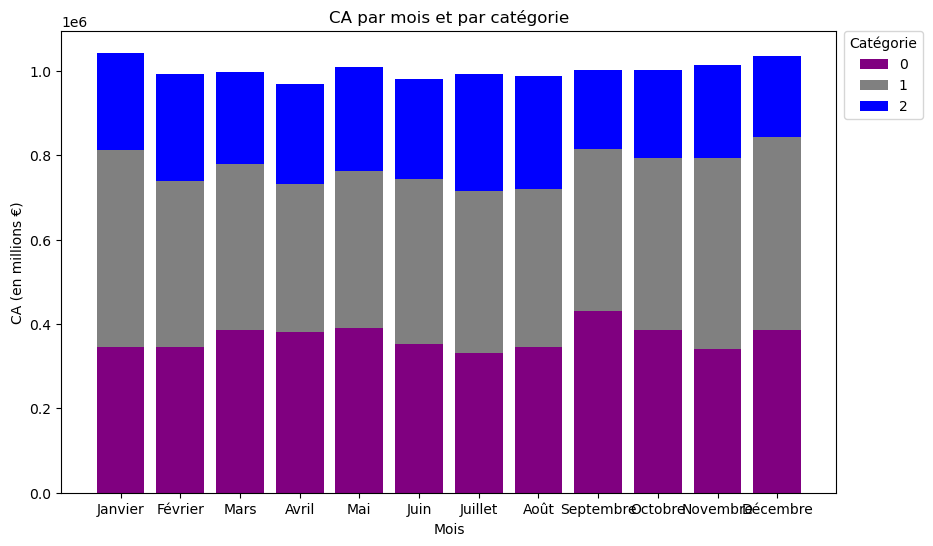

In [34]:
# Calcul du CA par mois par catégorie
CAmois = ptc.groupby(['month', 'categ'])['price'].sum().reset_index()
CAmois['price'] = CAmois['price'].round(2)  # Arrondir la colonne "price" à 2 décimales

# Création du graphique en utilisant une boucle
plt.figure(figsize=(10, 6))

categories = CAmois['categ'].unique()
colors = ['purple', 'grey', 'blue']
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

bottom = [0] * len(months)  # Ajustez la longueur de "bottom"

for i, cat in enumerate(categories):
    cat_data = CAmois[CAmois['categ'] == cat]
    plt.bar(cat_data['month'], cat_data['price'], bottom=bottom, color=colors[i], label=str(cat))
    bottom = [b + p for b, p in zip(bottom, cat_data['price'])]

plt.xticks(range(1, len(months) + 1), months)
plt.ylabel('CA (en millions €)')
plt.legend(title='Catégorie', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.title('CA par mois et par catégorie')
plt.xlabel('Mois')
plt.show()

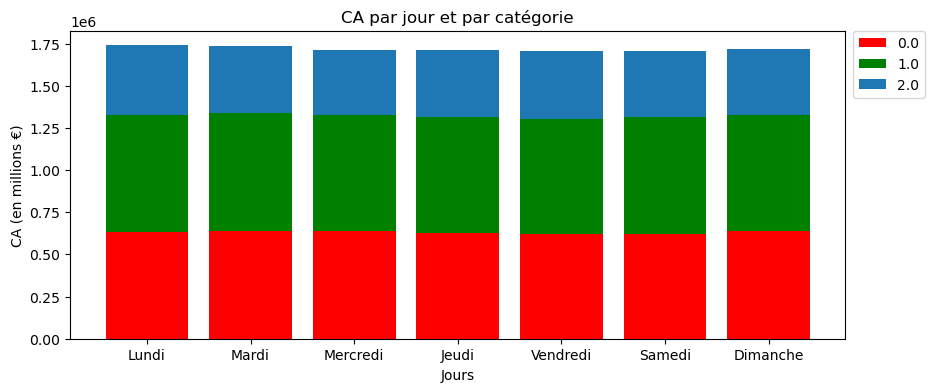

In [35]:
CAjour = ptc.groupby(['weekday','categ'])['price'].sum().reset_index().apply(lambda x: round(x, 2))
CAjour0 = CAjour.loc[CAjour['categ']==0]
CAjour1 =CAjour.loc[CAjour['categ']==1]
CAjour2 =CAjour.loc[CAjour['categ']==2]

plt.figure(figsize=(10,4))
plt.bar(CAjour0['weekday'],np.array(CAjour0['price']),color='red',label='0.0')
plt.bar(CAjour1['weekday'],CAjour1['price'],bottom = np.array(CAjour0['price']),color='green',label='1.0')
plt.bar(CAjour2['weekday'],CAjour2['price'],bottom = np.array(CAjour0['price'])+ np.array(CAjour1['price']),label='2.0')
plt.xlabel('Jours')
plt.ylabel('CA (en millions €)')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.title('CA par jour et par catégorie')
plt.xticks(np.arange(0,7), ['Lundi', 'Mardi', 'Mercredi','Jeudi','Vendredi','Samedi','Dimanche'])
plt.show()


### E. Tops produits

In [36]:
price = ptc[['id_prod','categ','price']].groupby('id_prod').value_counts().reset_index().rename(columns={0:'quantité'})
price['CA'] = (price['price']*price['quantité']).round(2)


In [37]:
# Trier par chiffre d'affaires (CA) décroissant pour obtenir les meilleures ventes
best_sales = price.sort_values('CA', ascending=False).head(3)

# Afficher les trois meilleures ventes
print('Les 3 meilleures ventes (toutes catégories confondues) en CA sont :')
display(best_sales[['id_prod', 'price', 'quantité', 'CA']])


Les 3 meilleures ventes (toutes catégories confondues) en CA sont :


,id_prod,price,quantité,CA
3096,2_159,145.99,650,94893.50
3070,2_135,68.99,1005,69334.95
3045,2_112,67.57,968,65407.76


In [38]:
# Trier par chiffre d'affaires (CA) croissant pour obtenir les pires ventes
worst_sales = price.sort_values('CA', ascending=True).head(3)

# Afficher les trois pires ventes
print('Les 3 pires ventes (toutes catégories confondues) en CA sont :')
display(worst_sales[['id_prod', 'price', 'quantité', 'CA']])


Les 3 pires ventes (toutes catégories confondues) en CA sont :


,id_prod,price,quantité,CA
595,0_1539,0.99,1,0.99
313,0_1284,1.38,1,1.38
719,0_1653,0.99,2,1.98


,categ,CA
0,0,4419730.97
1,1,4827657.11
2,2,2780275.02


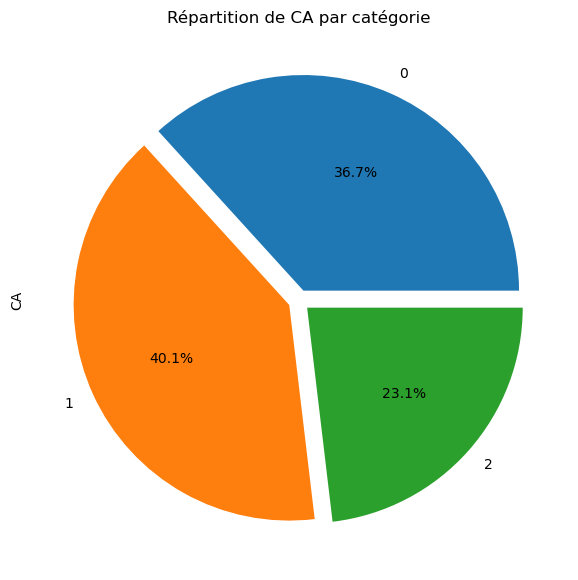

In [39]:
# CA par catégorie
pricepie = price.groupby('categ')['CA'].sum().reset_index()

display(pricepie)
plt.figure(figsize=(7,7))
pricepie['CA'].plot(kind='pie',autopct='%1.1f%%',subplots=True,explode=(0.05,0.05,0.05))
plt.title('Répartition de CA par catégorie')
plt.show()

### F. Ticket moyen par jour

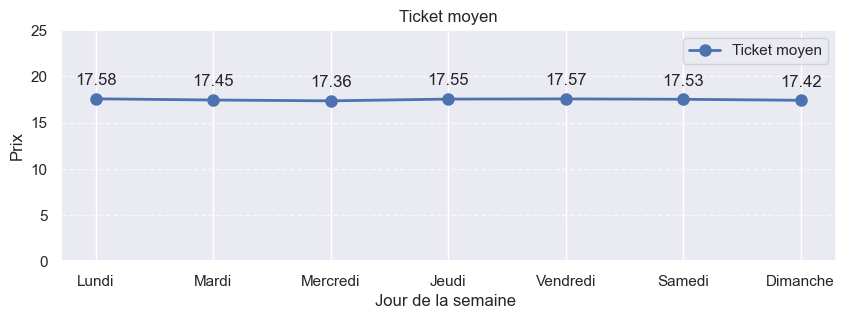

In [40]:
# Montant du ticket moyen par jour
td = ptc.groupby('weekday')['price'].mean().round(2).reset_index()
# Utilisation de seaborn pour visualiser
sns.set()
plt.figure(figsize=(10, 3))
plt.plot(td['weekday'], td['price'], marker='o', linestyle='-', color='b', linewidth=2, markersize=8, label='Ticket moyen')
# Ajout des annotations pour afficher les valeurs numériques
for x, y in zip(td['weekday'], td['price']):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel('Jour de la semaine ')
plt.xticks(np.arange(0, 7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.ylabel('Prix')
plt.title('Ticket moyen')
plt.ylim(0, 25)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### G. Moyenne mobile sur série temporelle 

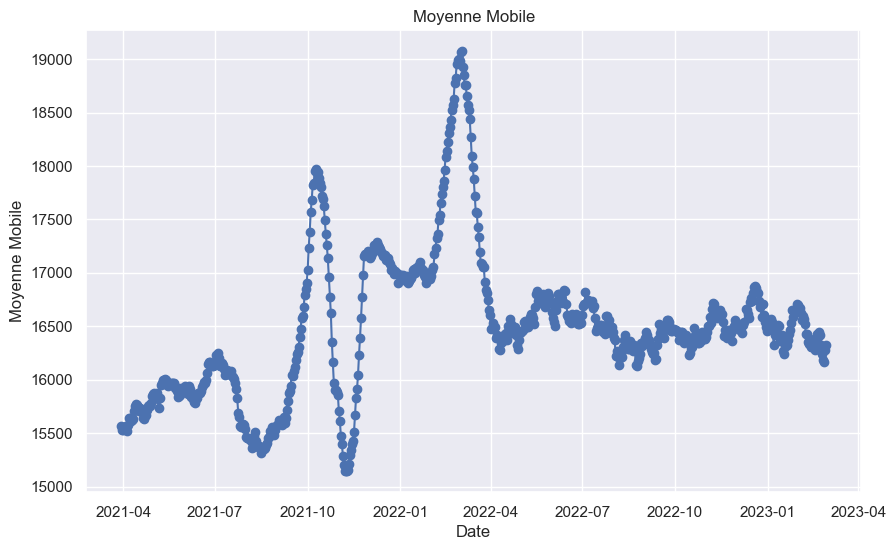

In [41]:
# Calcul de la moyenne mobile
bmm = ptc[['date', 'price']].groupby('date').sum()
bmm['mm_2year'] = bmm['price'].rolling(window=30).mean()

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(bmm.index, bmm['mm_2year'], marker='o', linestyle='-')
plt.title('Moyenne Mobile')
plt.xlabel('Date')
plt.ylabel('Moyenne Mobile')
plt.grid(True)
plt.show()


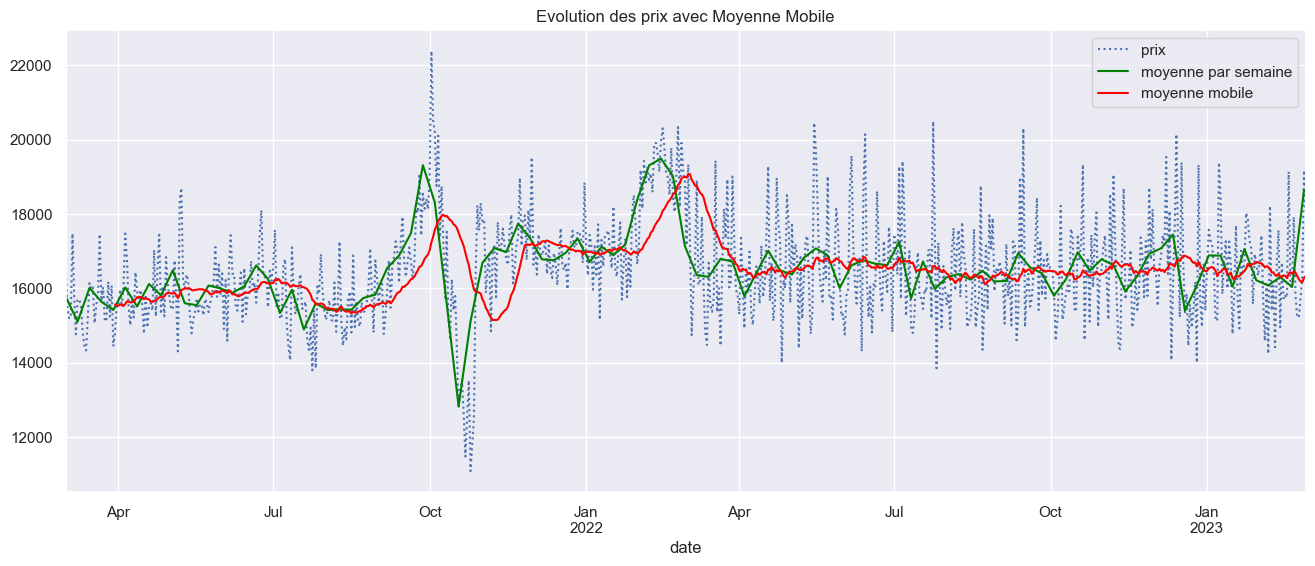

In [42]:
# Création du graphique
plt.figure(figsize=(16, 6))

# Plot de l'évolution des prix et de la moyenne mobile
bmm['price'].loc['2021':'2023'].plot(label='prix', ls=':')
bmm['price'].loc['2021':'2023'].resample('W').mean().plot(label='moyenne par semaine', color='green')
bmm['mm_2year'].loc['2021':'2023'].plot(label='moyenne mobile', color='red', linestyle='-')

plt.title('Evolution des prix avec Moyenne Mobile')
plt.legend()
plt.show()


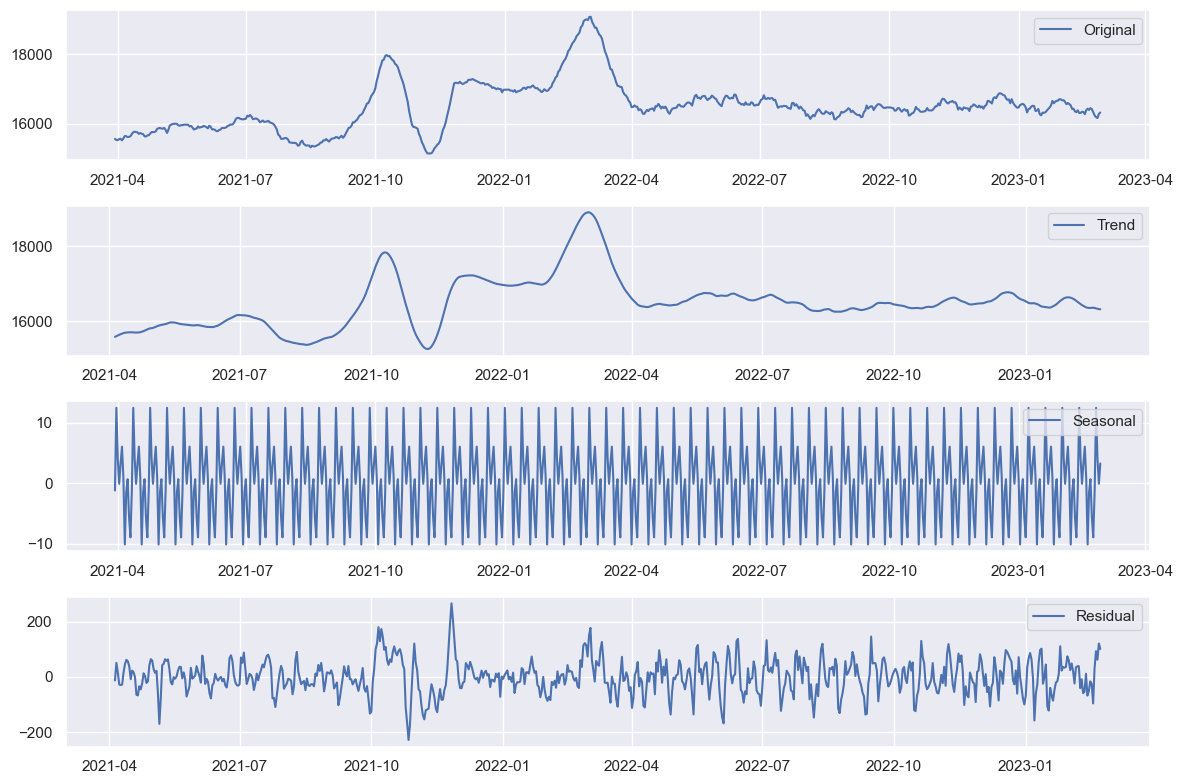

In [47]:
# La décomposition saisonnière additive
add_decomp = seasonal_decompose(x=bmm['mm_2year'].dropna(), model='additive', period=12)

# Affichez les composants décomposés
plt.figure(figsize=(12, 8))

# Composante observée
plt.subplot(4, 1, 1)
plt.plot(bmm['mm_2year'].dropna(), label='Original')
plt.legend()

# Composante tendance
plt.subplot(4, 1, 2)
plt.plot(add_decomp.trend, label='Trend')
plt.legend()

# Composante saisonnière
plt.subplot(4, 1, 3)
plt.plot(add_decomp.seasonal, label='Seasonal')
plt.legend()

# Composante résiduelle
plt.subplot(4, 1, 4)
plt.plot(add_decomp.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


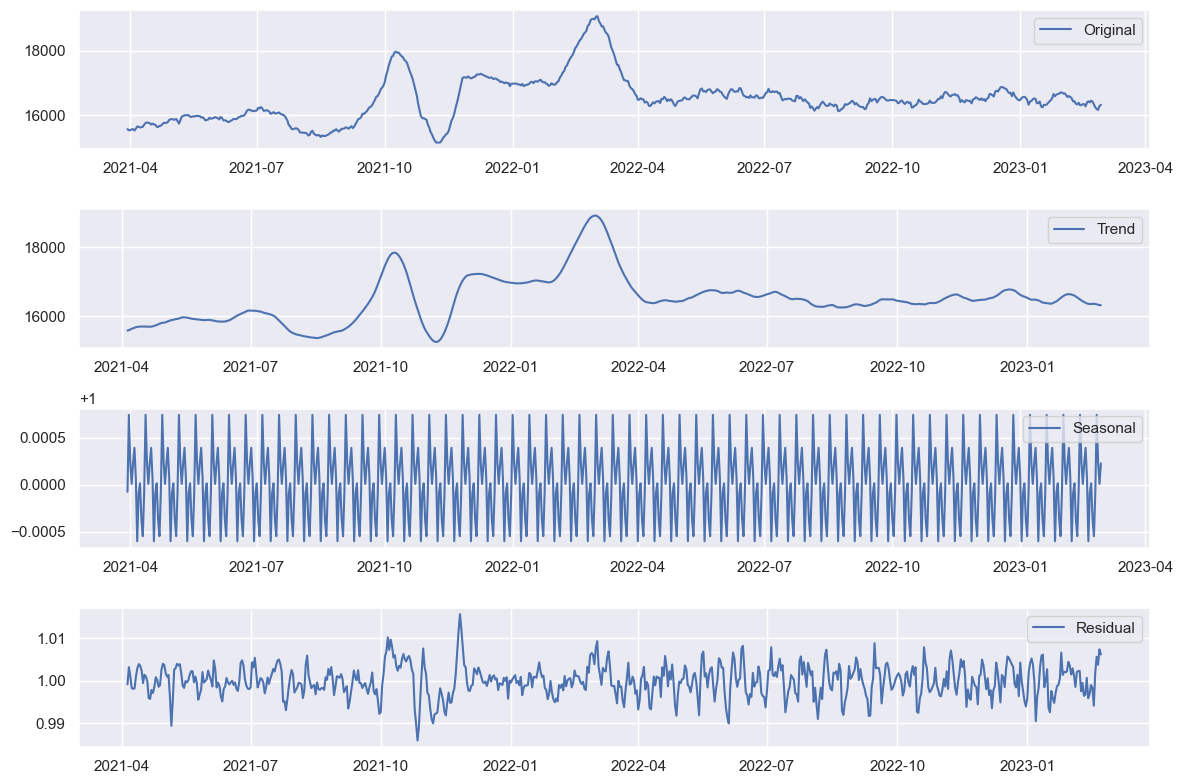

In [48]:
# Décomposition saisonnière multiplicative
mult_decomp = seasonal_decompose(x=bmm['mm_2year'].dropna(), model='multiplicative', period=12)

# Affichez les composants décomposés
plt.figure(figsize=(12, 8))

# Composante observée
plt.subplot(4, 1, 1)
plt.plot(bmm['mm_2year'].dropna(), label='Original')
plt.legend()

# Composante tendance
plt.subplot(4, 1, 2)
plt.plot(mult_decomp.trend, label='Trend')
plt.legend()

# Composante saisonnière
plt.subplot(4, 1, 3)
plt.plot(mult_decomp.seasonal, label='Seasonal')
plt.legend()

# Composante résiduelle
plt.subplot(4, 1, 4)
plt.plot(mult_decomp.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

### H. Prédictions sur les séries temporelles

<Figure size 1200x400 with 0 Axes>

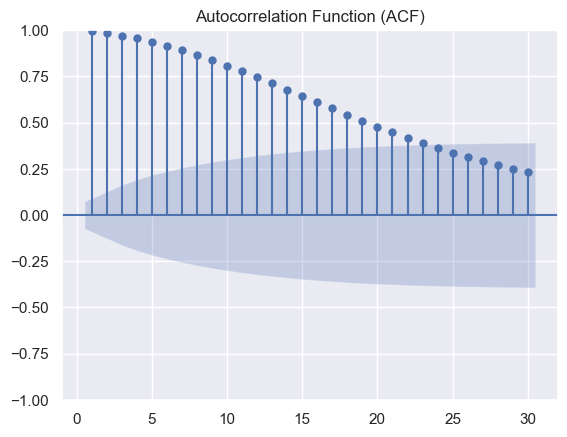

<Figure size 1200x400 with 0 Axes>

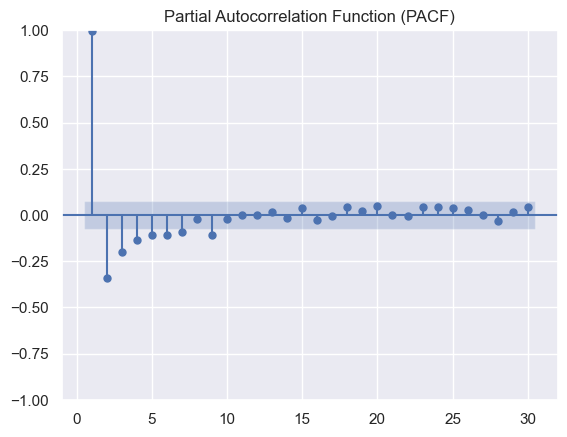

In [56]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Supposons que bmm['mm_2year'] est votre série temporelle avec la moyenne mobile appliquée
# Assurez-vous d'avoir vos données préparées avant cette étape

# Tracer l'ACF
plt.figure(figsize=(12, 4))
plot_acf(bmm['mm_2year'].dropna(), lags=30, zero=False)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Tracer la PACF
plt.figure(figsize=(12, 4))
plot_pacf(bmm['mm_2year'].dropna(), lags=30, zero=False)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


C:\Users\roulh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\roulh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\roulh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


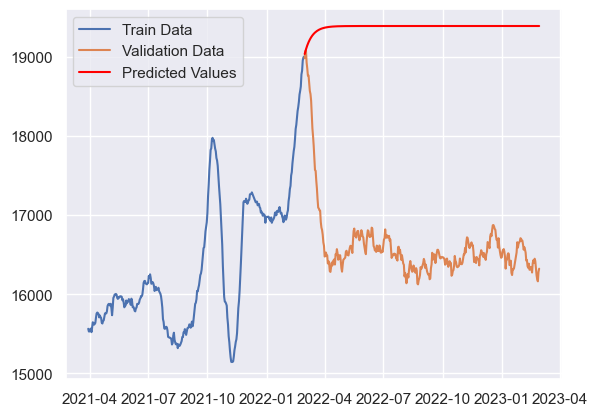

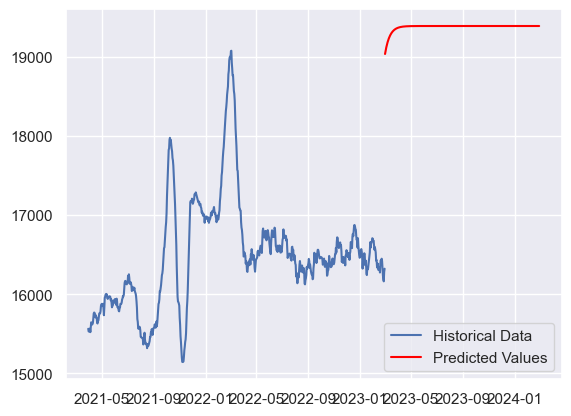

In [62]:
train_data = bmm['mm_2year'].dropna().iloc[:-365]  # Utilisez tous les points sauf les 365 derniers pour l'entraînement
validation_data = bmm['mm_2year'].dropna().iloc[-365:]  # Les 365 derniers points pour la validation

# Entraînez le modèle ARIMA sur la partie d'entraînement
model = ARIMA(train_data, order=(1, 1,1) )

# Faites des prédictions sur la partie de validation
predictions = fit_model.predict(start=len(train_data), end=len(train_data) + len(validation_data) - 1)

# Affichez les résultats
plt.plot(train_data, label='Train Data')
plt.plot(validation_data.index, validation_data, label='Validation Data')
plt.plot(validation_data.index, predictions, label='Predicted Values', color='red')
plt.legend()
plt.show()

# Prédiction pour 2023
future_dates = [bmm.index[-1] + timedelta(days=i) for i in range(1, 366)]  # Pour l'année complète de 2023
forecast = fit_model.get_forecast(steps=365)
predicted_values = forecast.predicted_mean

# Affichage des résultats
plt.plot(bmm['mm_2year'], label='Historical Data')
plt.plot(future_dates, predicted_values, label='Predicted Values', color='red')
plt.legend()
plt.show()


In [43]:
vente2023 = ptc.loc[ptc['year'] == 2023].groupby('date')['categ'].value_counts().unstack().reset_index()
vente2023['date'] = pd.to_datetime(vente2023['date'])

# Définir la colonne 'date' comme index
vente2023.set_index('date', inplace=True)

# Utiliser resample pour agréger par mois et remplir les valeurs manquantes avec 0
vente2023_resampled = vente2023.resample('M').sum().fillna(0).reset_index()


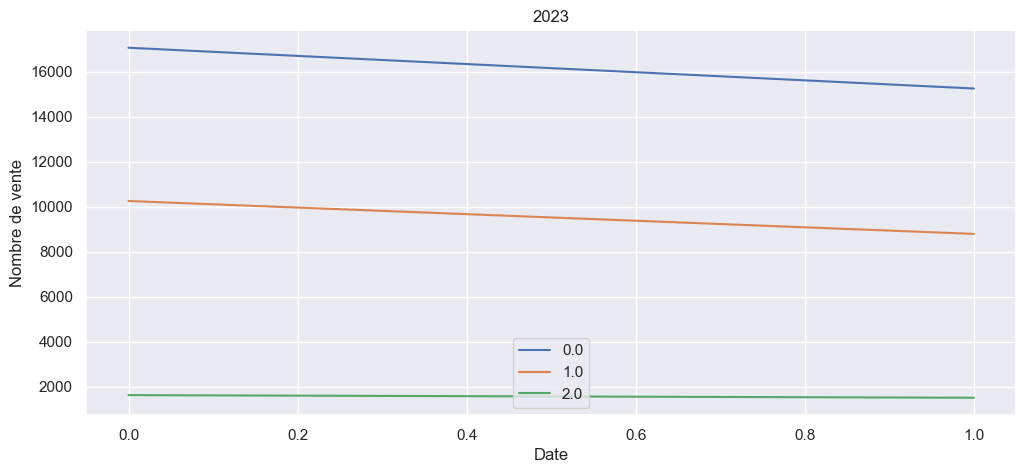

In [44]:
plt.figure(figsize=(12, 5))
plt.title('2023')
plt.plot(vente2023_resampled.index, vente2023_resampled[0.0], label='0.0')
plt.plot(vente2023_resampled.index, vente2023_resampled[1.0], label='1.0')
plt.plot(vente2023_resampled.index, vente2023_resampled[2.0], label='2.0')
plt.xlabel('Date')
plt.ylabel('Nombre de vente')
plt.legend()
plt.show()

# Partie 3. Analyse clients:

### A. Calculer l'acquisition des nouveaux clients

In [45]:
#Préparer un df pour calculer l'acquisition de nouveaux clients
acq = ptc[['date','client_id']].sort_values('date').drop_duplicates('client_id', keep='first')
acq = acq.groupby('date').agg({'client_id':'count'}).reset_index()

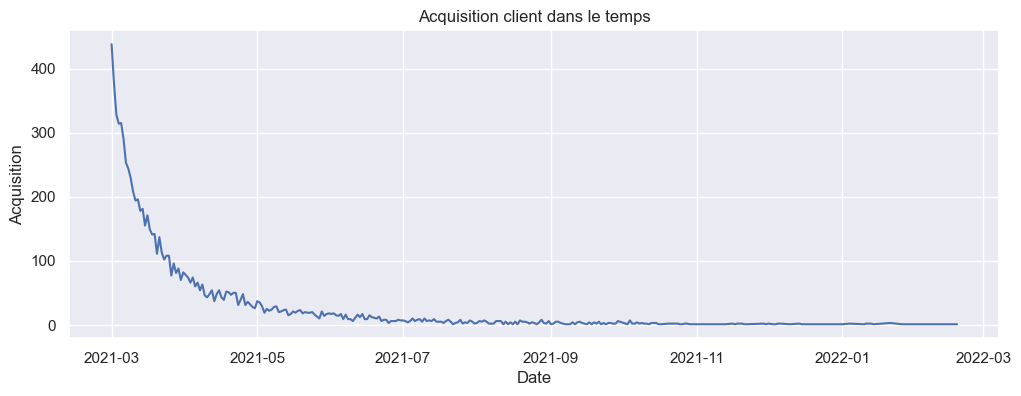

In [46]:
#Visualisation
plt.figure(figsize=(12,4))
sns.lineplot(data=acq ,x='date',y='client_id')
plt.ylabel('Acquisition')
plt.xlabel('Date')
plt.title('Acquisition client dans le temps')
plt.show()

In [47]:
acq_genre = ptc[['date','client_id','sex']].sort_values('date').drop_duplicates('client_id',keep='first')
acq_genre = acq_genre.groupby(['date','sex']).agg({'sex':'count'})
acq_genre = acq_genre.unstack().reset_index()
acq_genre = acq_genre.fillna(0) #combler les valeurs nulls

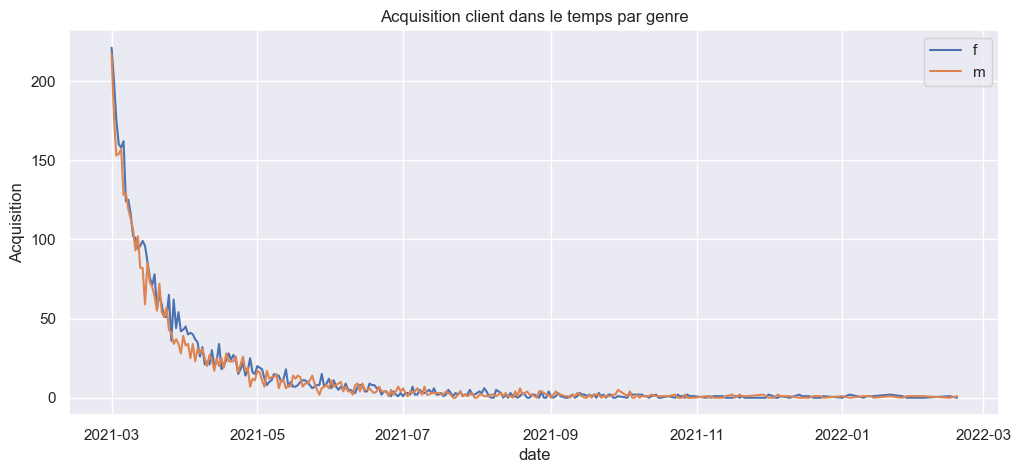

In [48]:
plt.figure(figsize=(12,5))
sns.lineplot(data = acq_genre ,x='date',y=acq_genre['sex','f'],label='f')
sns.lineplot(data = acq_genre ,x='date',y=acq_genre['sex','m'],label='m')
plt.ylabel('Acquisition')
plt.title('Acquisition client dans le temps par genre')
plt.show()

### B. Analyse ciblée client 

In [49]:
#Fusion des données de dépense, d'achat et d'informations client sur la colonne 'client_id'
client_depense =ptc.groupby('client_id')['price'].sum().reset_index().round(2)
achat =ptc.groupby('client_id')['session_id'].value_counts().groupby('client_id').sum()
client_depense_achat = pd.merge(client_depense,achat,on='client_id',how='inner')
info = ptc[['client_id','sex','age']].sort_values('client_id').drop_duplicates()
#Préparation du DF client 
client = pd.merge(client_depense_achat, info, on='client_id', how='left')


In [50]:
# Tri des données client en fonction du nombre de sessions dans l'ordre décroissant
client.sort_values('session_id', ascending=False).head()


,client_id,price,session_id,sex,age
677,c_1609,326039.89,25586,m,43
6337,c_6714,153918.60,9199,f,55
2724,c_3454,114110.57,6793,m,54
4388,c_4958,290227.03,5222,m,24
1268,c_2140,5260.18,405,f,46


In [51]:
# Recherche de profil particulier avec plus de 5000 connections pour achat
client.loc[client['session_id']>5000].sort_values('price',ascending=False)

,client_id,price,session_id,sex,age
677,c_1609,326039.89,25586,m,43
4388,c_4958,290227.03,5222,m,24
6337,c_6714,153918.60,9199,f,55
2724,c_3454,114110.57,6793,m,54


Une fréquence d'achat et des dépenses anormalements élevées pour ces 4 lignes je les identifie comme des "clients professionnels".
Nous allons nous concentrer sur ceux qui ont moins de 5000 achats pour avoir un panel de client composé de particuliers à étudier.

In [52]:
client = client[client['session_id'] < 5000]

# Réindexer le DataFrame
client = client.reset_index(drop=True)
# Vérification
client.loc[client['session_id']>5000].sort_values('price',ascending=False)

,client_id,price,session_id,sex,age


### C. Nos clients par genres

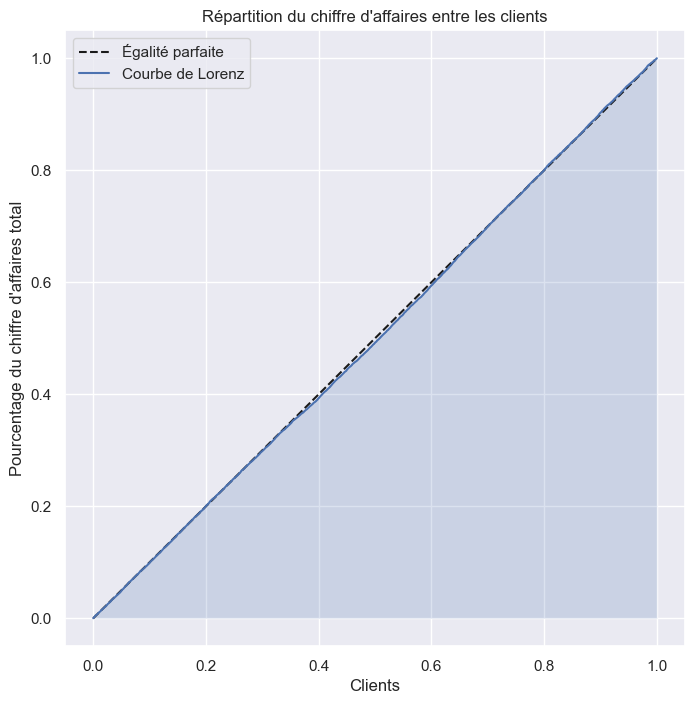

In [53]:
# Calculez le pourcentage cumulatif du chiffre d'affaires total
client['cumulative_percentage'] = (client['price'].cumsum() / client['price'].sum())

# Créez la figure pour la Courbe de Lorenz
plt.figure(figsize=(8, 8))

# Tracez la ligne d'égalité parfaite (diagonale)
plt.plot([0, 1], [0, 1], 'k--', label="Égalité parfaite")

#'cumulative_percentage' sur l'axe des y et 'client.index / len(client)' sur l'axe des x
plt.plot(client.index / len(client), client['cumulative_percentage'], label="Courbe de Lorenz")

# Remplissez l'aire sous la Courbe de Lorenz
plt.fill_between(client.index / len(client), client['cumulative_percentage'], alpha=0.2)

# Ajoutez des étiquettes d'axe et un titre
plt.xlabel("Clients")
plt.ylabel("Pourcentage du chiffre d'affaires total")
plt.title("Répartition du chiffre d'affaires entre les clients")

# Ajoutez une légende
plt.legend()

# Affichez le graphique
plt.show()


In [54]:
# Calculez le coefficient de Gini à partir de la courbe de Lorenz
AUC_triangle = np.trapz(client.index / len(client), client['cumulative_percentage'])
AUC_lorenz = 0.5 - AUC_triangle
Gini = 2 * AUC_lorenz

# Affichez le coefficient de Gini si proche de 0 la répartition est égalitaire
print(f"Le coefficient de Gini est : {Gini}")

Le coefficient de Gini est : -0.003680533384516238


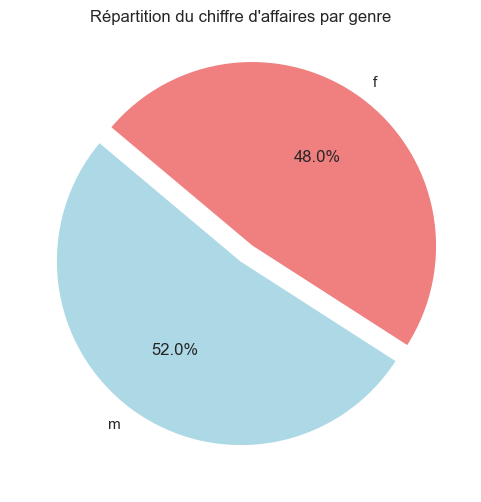

In [55]:
plt.figure(figsize=(6, 6))
explode = (0, 0.1)
plt.pie(client.groupby('sex')['price'].sum(), labels=client['sex'].unique(), autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'], explode=explode)
plt.title("Répartition du chiffre d'affaires par genre")
plt.show()

### D. Répartition en fonction de leur age

In [56]:
# Discrétiser la variable âge
client.loc[(client['age']>=19)&(client['age']<=31),'group']=1
client.loc[(client['age']>31)&(client['age']<=43),'group']=2
client.loc[(client['age']>43)&(client['age']<=55),'group']=3
client.loc[(client['age']>55)&(client['age']<=67),'group']=4
client.loc[(client['age']>67)&(client['age']<=79),'group']=5
client.loc[(client['age']>79),'group']=6

C:\Users\roulh\AppData\Local\Temp\ipykernel_16708\2579500055.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=client, x='group', y='price', ci=None, palette='viridis')


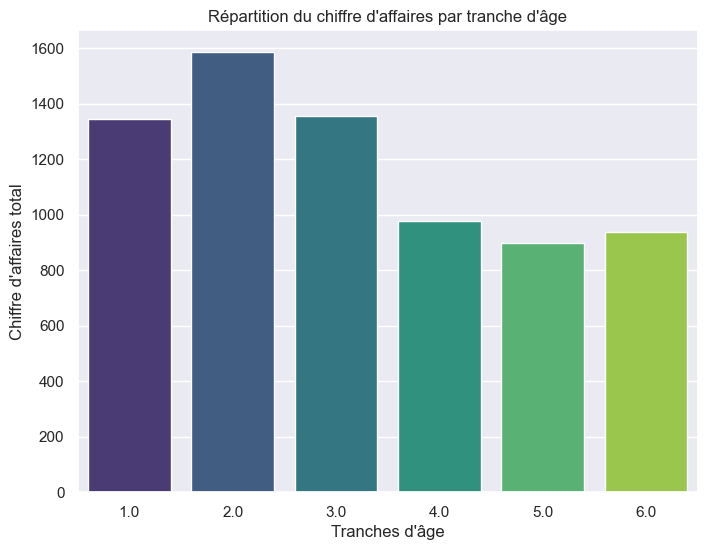

In [57]:
# Créez une figure pour la visualisation
plt.figure(figsize=(8, 6))

# Utilisez la bibliothèque Seaborn pour créer un graphique à barres de la répartition du chiffre d'affaires par tranche d'âge
sns.barplot(data=client, x='group', y='price', ci=None, palette='viridis')

# Ajoutez des étiquettes d'axe et un titre
plt.xlabel("Tranches d'âge")
plt.ylabel("Chiffre d'affaires total")
plt.title("Répartition du chiffre d'affaires par tranche d'âge")

# Montrez le graphique
plt.show()


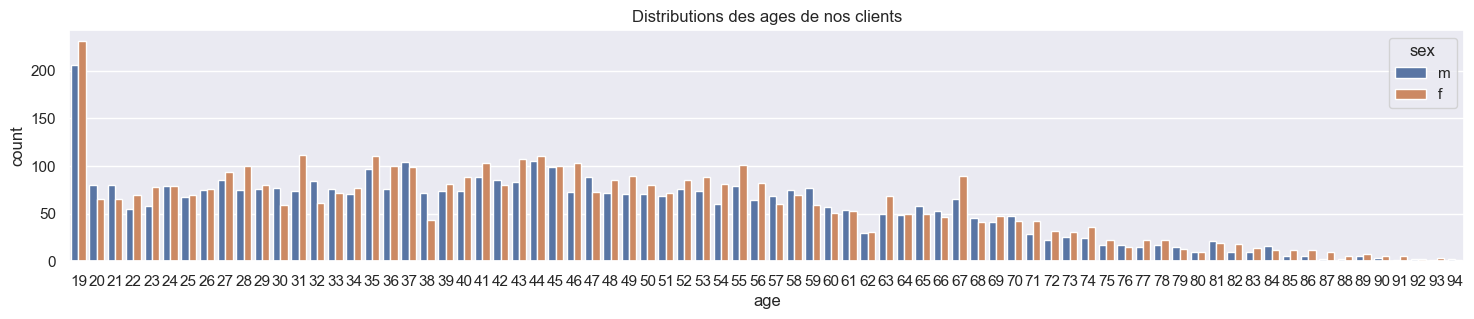

In [58]:
plt.figure(figsize=(18,3))
sns.countplot(data=client,x='age',hue='sex')
plt.title('Distributions des ages de nos clients')
plt.show()

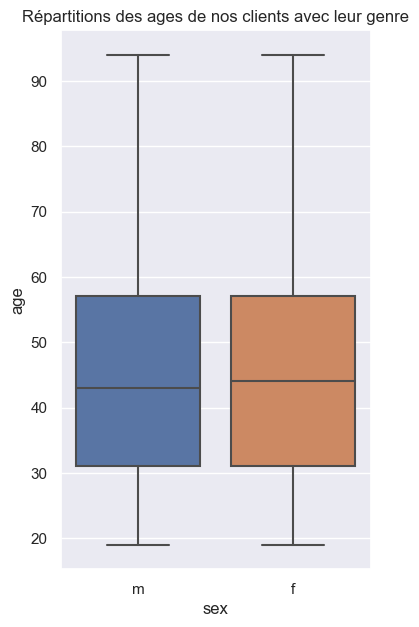

In [59]:
plt.figure(figsize=(4,7))
sns.boxplot(y=client['age'],x=client['sex'])
plt.title('Répartitions des ages de nos clients avec leur genre')
plt.show()

### E. Nos Tops clients (Hors professionnels)

In [85]:
print('Nos meilleurs clients (en dépense):')
display(client.sort_values('price', ascending=False).head(3))

print('Nos meilleurs clients (en quantité):')
display(client.sort_values('session_id', ascending=False).head(3))

print('Nos clients les moins actifs (en dépense):')
display(client.sort_values('price').head(3))

print('Nos clients les moins actifs (en quantité):')
display(client.sort_values('session_id').head(3))


Nos meilleurs clients (en dépense):


,client_id,price,session_id,sex,age,cumulative_percentage,group
634,c_1570,5286.0,370,f,44,0.073975,3.0
2512,c_3263,5277.0,403,f,38,0.290755,2.0
1267,c_2140,5260.0,405,f,46,0.146811,3.0


Nos meilleurs clients (en quantité):


,client_id,price,session_id,sex,age,cumulative_percentage,group
1267,c_2140,5260.0,405,f,46,0.146811,3.0
2512,c_3263,5277.0,403,f,38,0.290755,2.0
1771,c_2595,4960.0,398,m,49,0.207076,3.0


Nos clients les moins actifs (en dépense):


,client_id,price,session_id,sex,age,cumulative_percentage,group
8147,c_8351,6.0,1,f,55,0.950760,3.0
7914,c_8140,8.0,2,m,52,0.923030,3.0
7885,c_8114,10.0,2,m,61,0.919692,4.0


Nos clients les moins actifs (en quantité):


,client_id,price,session_id,sex,age,cumulative_percentage,group
8147,c_8351,6.0,1,f,55,0.950760,3.0
3574,c_4223,25.0,1,f,72,0.409054,5.0
693,c_1624,29.0,1,m,31,0.080254,1.0


### F. Répartition des dépenses clients

In [61]:
client['price'] = client['price'].round(0)

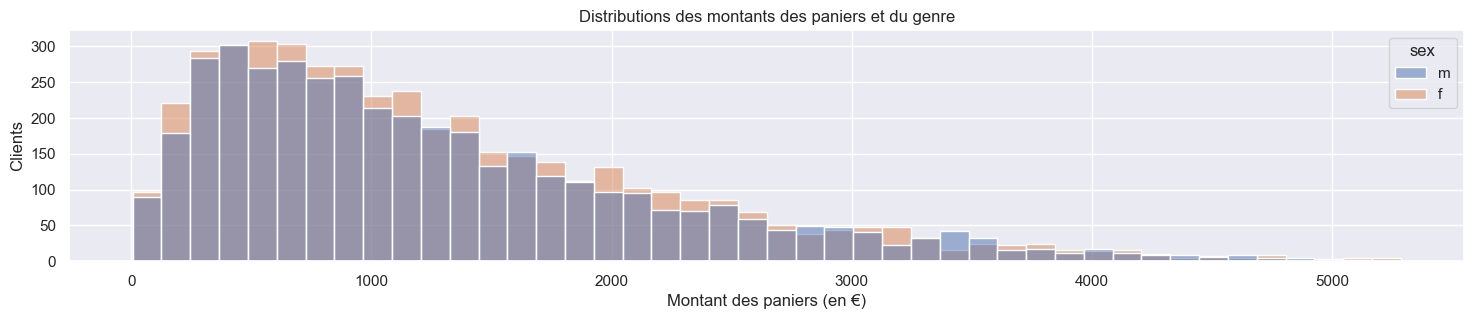

In [62]:
plt.figure(figsize=(18,3))
sns.histplot(data=client,x='price',hue='sex')
plt.title('Distributions des montants des paniers et du genre')
plt.xlabel('Montant des paniers (en €)')
plt.ylabel('Clients')
plt.show()


## G. Pareto sur les produits 


In [63]:
# Calculez le chiffre d'affaires total par produit
product_sales = ptc.groupby('id_prod')['price'].sum().reset_index()

# Triez les produits par chiffre d'affaires décroissant
sorted_products = product_sales.sort_values(by='price', ascending=False)

# Identifiez les 20 % des produits qui génèrent 80 % des ventes
top_20_percent = int(0.2 * len(sorted_products))
top_products = sorted_products.head(top_20_percent)

# Calculez le pourcentage du chiffre d'affaires total généré par ces produits
total_sales = product_sales['price'].sum()
top_sales = top_products['price'].sum()
percentage_of_total_sales = (top_sales / total_sales) * 100

# Affichez les produits et le pourcentage du chiffre d'affaires total qu'ils représentent
print("20 % des produits qui génèrent 80 % des ventes :")
print(top_products)
print(f"Pourcentage du chiffre d'affaires total : {percentage_of_total_sales:.2f}%")


20 % des produits qui génèrent 80 % des ventes :
     id_prod     price
3096   2_159  94893.50
3070   2_135  69334.95
3045   2_112  65407.76
3034   2_102  60736.78
3152   2_209  56971.86
...      ...       ...
59    0_1053   4571.84
21    0_1018   4567.78
531   0_1481   4560.57
3149   2_206   4557.44
2362   1_162   4542.56

[653 rows x 2 columns]
Pourcentage du chiffre d'affaires total : 78.32%


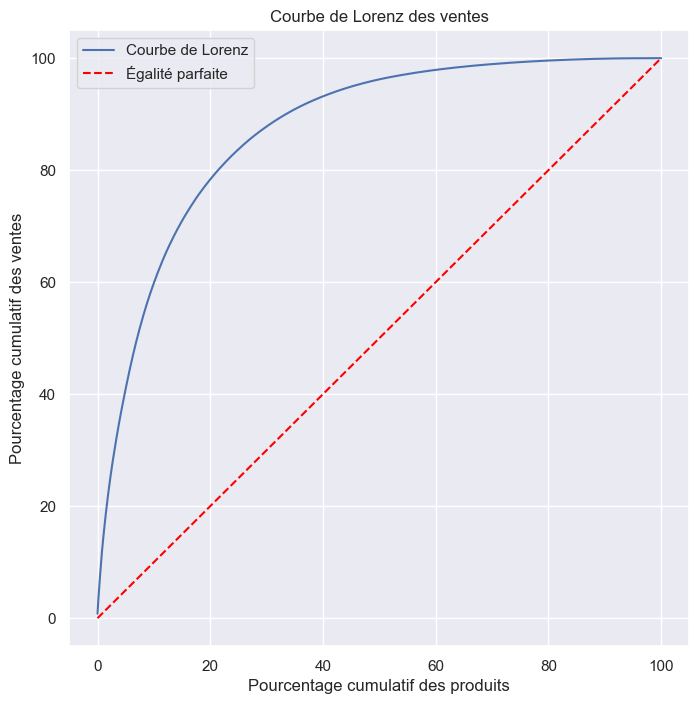

In [64]:
# Triez les produits par chiffre d'affaires décroissant
sorted_products = product_sales.sort_values(by='price', ascending=False)

# Calcul des parts cumulatives des ventes
sorted_products['cumulative_percentage'] = (sorted_products['price'].cumsum() / total_sales) * 100

# Plot de la courbe de Lorenz
plt.figure(figsize=(8, 8))
plt.plot(np.linspace(0, 100, len(sorted_products)), sorted_products['cumulative_percentage'], label='Courbe de Lorenz')
plt.plot([0, 100], [0, 100], linestyle='--', color='red', label='Égalité parfaite')

# Ajouter des étiquettes et un titre
plt.title('Courbe de Lorenz des ventes')
plt.xlabel('Pourcentage cumulatif des produits')
plt.ylabel('Pourcentage cumulatif des ventes')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()


# Partie 6: Tests de corrélation

In [65]:
# Créer une liste des identifiants clients à supprimer suivant les indications précédentes
clients_to_remove = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

# Filtrer les lignes de ptc pour exclure les identifiants spécifiés
ptc = ptc[~ptc['client_id'].isin(clients_to_remove)]

# Réindexer le DataFrame
ptc = ptc.reset_index(drop=True)


### A. Entre genre du client et la catégorie des livres achetés

contingence :-n sex         f       m
categ                
0      200793  186488
1      115721  104884
2       16980   15868


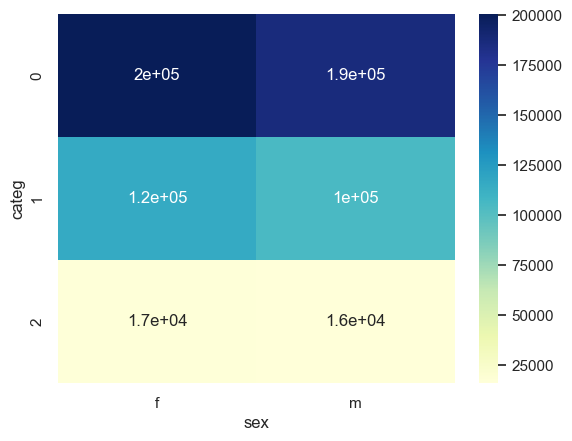

In [66]:
# Table de contingence
contingence = pd.crosstab(ptc['categ'], ptc['sex'])
print ('contingence :-n',contingence)

# Création d'un graphique de chaleur (heatmap) pour visualiser la table de contingence
plt.figure() 

# Utilisation de la bibliothèque Seaborn pour afficher un heatmap avec des annotations
sns.heatmap(contingence, annot=True, cmap="YlGnBu")
plt.show()

Test du Chi carré Hypothèses:

HO : Les deux variables sont indépendantes / pas de corrélation (p_value < 0.05)

H1 : Les deux variables sont dépendantes / ont une corrélation (p_value > 0.05)

In [67]:
# Effectuez le test du chi-carré librarie Spicy
chi2, p, _, _ = chi2_contingency(contingence)

print("Statistique de test du chi-carré:", chi2)
print("p_value:",p)


Statistique de test du chi-carré: 22.66856665178056
p_value: 1.1955928116587024e-05


In [68]:
if p < 0.05:
    print("La p-value est inférieure au seuil de signification (alpha).")
    print("On rejette l'hypothèse nulle.")
    print("Il existe une association significative entre les variables 'sex' et 'categ'.")
else:
    print("La p-value est supérieure au seuil de signification (alpha).")
    print("On ne rejette pas l'hypothèse nulle.")
    print("Les variables 'sex' et 'categ' sont considérées comme indépendantes.")

La p-value est inférieure au seuil de signification (alpha).
On rejette l'hypothèse nulle.
Il existe une association significative entre les variables 'sex' et 'categ'.


## B. Lien entre age du client et montant total des achats

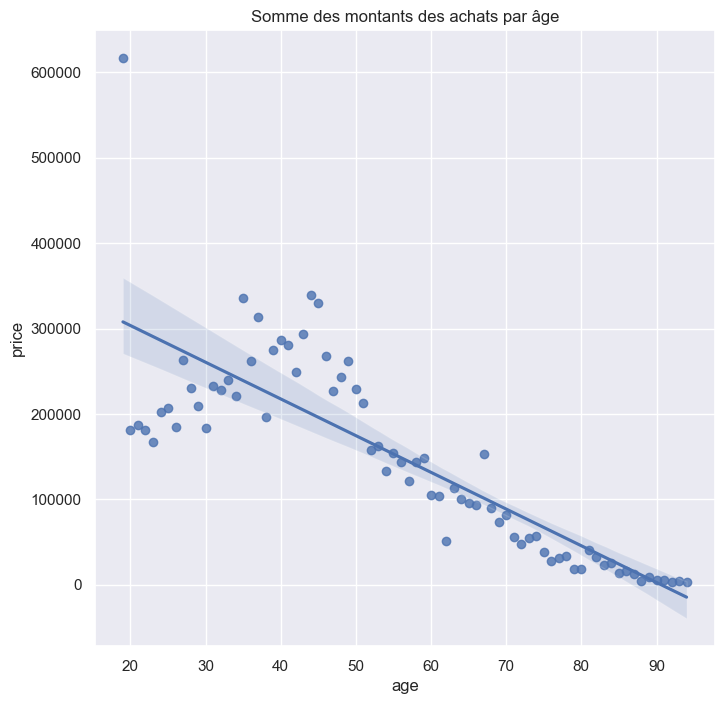

In [69]:
# Regroupe les données de la colonne 'age' par âge et calcule la somme des prix d'achat correspondants                                                                                                                                   
age_montant = client.groupby('age')['price'].sum().reset_index()
# Sépare les données en X (âge) et Y (montant total des achats)
Y = age_montant['price']
X = age_montant['age']
# Crée le graphique de régression
plt.figure(figsize=(8, 8))
# graphique de régression, montrant la relation entre l'âge et le montant total des achats
sns.regplot(data=age_montant, x='age', y='price', fit_reg=True)
# Ajoute un titre au graphique
plt.title("Somme des montants des achats par âge")
# Affiche le graphique
plt.show()

La ligne de régression tracée sur le graphique indique la tendance ou la corrélation entre age et montant des achats.

Test de Pearson
HO : Les deux variables sont indépendantes, pas de corrélation significative entre elles si la P-value est inférieure à 0.05.

H1 : Les deux variables sont dépendantes, il existe une corrélation significative entre elles si la p_value est supérieure 0.05.

In [70]:
# Test pearson avec nos deux variables quantitatives
r,p=stats.pearsonr(age_montant['age'],age_montant['price'])
print('test de pearson:',r)
print('P-value:',p)

test de pearson: -0.8306333804168766
P-value: 1.685760322474187e-20


Le coefficient de Pearson est -0.8306333804168766. Ce chiffre est proche de -1, ce qui suggère une forte corrélation négative entre les deux variables.

La P-value est un indicateur de la significativité statistique de la corrélation. La P-value est très faible (1.685760322474187e-20), ce qui signifie que la corrélation négative observée est statistiquement significative. En d'autres termes, il est peu probable qu'elle soit due au hasard.

## C. Entre age du client et fréquence d'achat

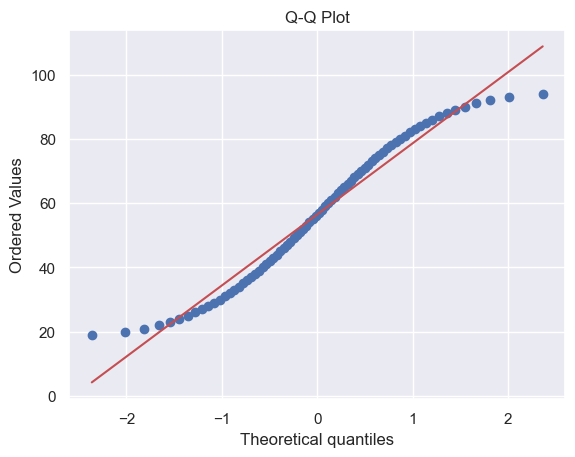

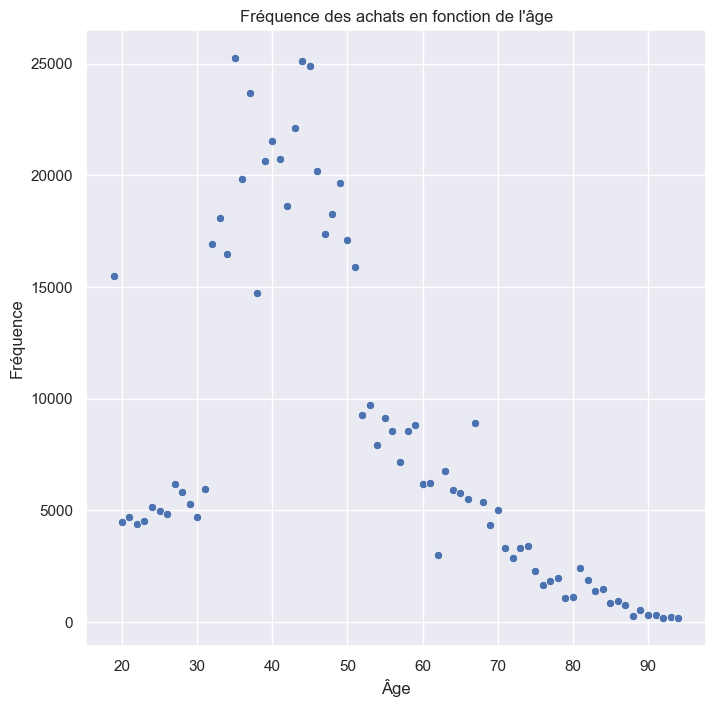

In [71]:
# création df pour regrouper 'age' par âge et calculer la somme des id_session correspondants
age_frequence = client.groupby('age')['session_id'].sum().reset_index()
# QQplot vérifier nos quantiles face aux quantiles de la loi normale
data = age_frequence['age']
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# Créer graphique de dispersion
plt.figure(figsize=(8, 8))
sns.scatterplot(data=age_frequence, x='age', y='session_id')
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.title("Fréquence des achats en fonction de l'âge")
plt.show()

Test de pearson
Hypothèse nulle (H0) : Les deux variables sont dépendantes ou ont une corrélation significative (p-valeur > 0.05).

Hypothèse alternative (H1) : Les deux variables sont indépendantes et n'ont pas de corrélation significative (p-valeur < 0.05).

In [72]:
#Test pearson
r,p=stats.pearsonr(age_frequence['age'],age_frequence['session_id'])
print('test de pearson:',r)
print('P-value:',p)

test de pearson: -0.5774625517171508
P-value: 4.732169314077601e-08


Le coefficient de Pearson indique une corrélation négative forte entre l'âge des clients et la fréquence d'achat. De plus, la p-value très faible confirme qu'il existe des preuves statistiques solides pour étayer cette corrélation négative.

OUI l'âge des clients est corrélé négativement à la fréquence d'achat, ce qui signifie que, en général, à mesure que l'âge des clients augmente, la fréquence d'achat diminue de manière significative.

## D. Entre age du client et taille du panier moyen

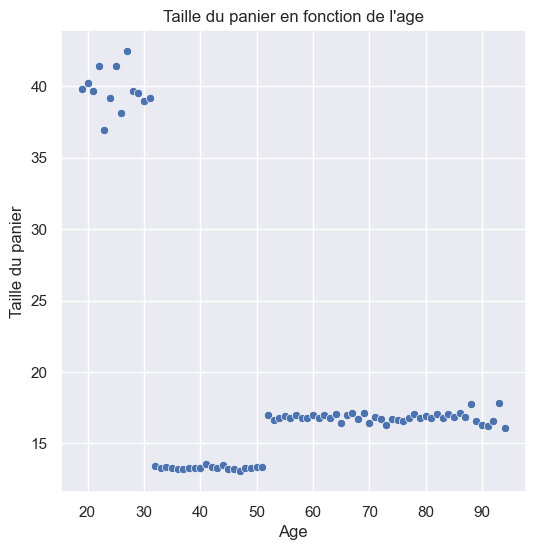

In [73]:
#Deux variables quantitatives visualiser 
age_panier = ptc[['age','session_id','price']].groupby('age')['price'].mean().reset_index()
Y = age_panier['price']
X = age_panier['age']
plt.figure(figsize=(6,6))
sns.scatterplot(data=age_panier,x='age',y='price')
plt.xlabel("Age")
plt.ylabel("Taille du panier")
plt.title("Taille du panier en fonction de l'age")
plt.show()

Test de Pearson
Hypothèse nulle (H0) : Les deux variables sont dépendantes ou ont une corrélation significative (p-valeur > 0.05).

Hypothèse alternative (H1) : Les deux variables sont indépendantes et n'ont pas de corrélation significative (p-valeur < 0.05).

In [74]:
r,p=stats.pearsonr(age_panier['age'],age_panier['price'])
print('test de pearson:',r)
print('P-value:',p)

test de pearson: -0.5443989912175687
P-value: 3.7068907776337503e-07


Les résultats confirment qu'il y a une corrélation négative significative entre l'âge du client et la taille du panier moyen. Plus précisément, à mesure que l'âge du client augmente, la taille du panier moyen diminue de manière modérée. 

## E. Entre age du client et catégories des livres achetés

Text(0.5, 1.0, 'age en fonction de categ')

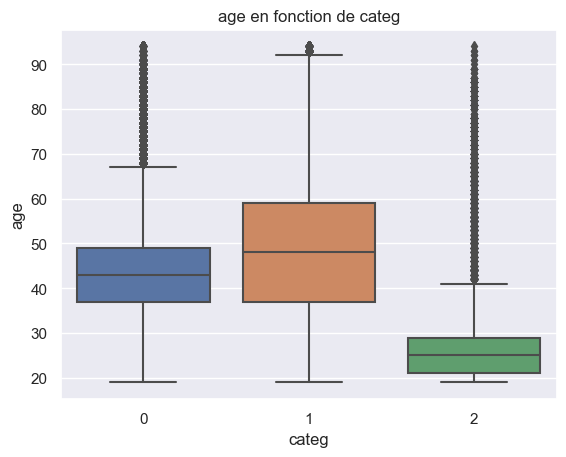

In [75]:
# Variable qualitative ('categ') et quantitative ('age')
# Calculer la moyenne de chaque catégorie pour la variable qualitative
ptc.groupby('categ')['age'].mean()
# Tracer le boxplot sns.set_theme(style="whitegrid")
sns.boxplot(x="categ", y="age", data=ptc).set_title('age en fonction de categ')

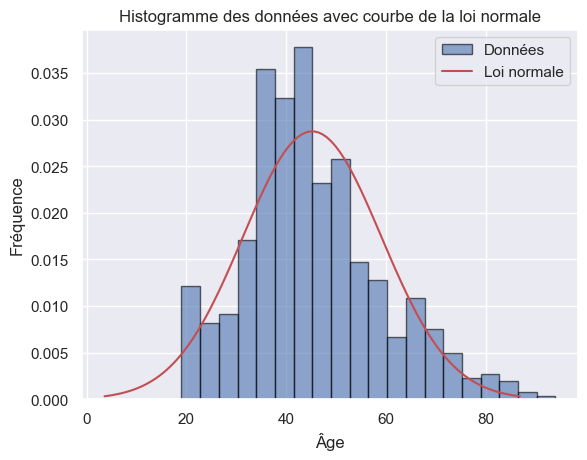

In [76]:
#Visualiser variable quantitative
data = ptc['age']
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Données', edgecolor='black')

# Créer une plage de valeurs pour la courbe de la loi normale
mu, std = data.mean(), data.std()
x = np.linspace(mu - 3 * std, mu + 3 * std, 100)

# Calculer la densité de probabilité de la loi normale
pdf = stats.norm.pdf(x, mu, std)

# Tracer la courbe de la loi normale
plt.plot(x, pdf, 'r-', label='Loi normale')

plt.title("Histogramme des données avec courbe de la loi normale")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

In [77]:
# Calcul du skewness et du kurtosis pour la variable 'age'
skewness_age = stats.skew(ptc['age'])
kurtosis_age = stats.kurtosis(ptc['age'], fisher=False) 

# Calcul du skewness et du kurtosis pour la variable 'categ'
skewness_categ = stats.skew(ptc['categ'])
kurtosis_categ = stats.kurtosis(ptc['categ'], fisher=False) 

# Afficher les résultats
print(f"Skewness de 'age': {skewness_age}")
print(f"Kurtosis réel de 'age': {kurtosis_age}")
print(f"Skewness de 'categ': {skewness_categ}")
print(f"Kurtosis réel de 'categ': {kurtosis_categ}")

# Analyse des résultats
def skewness_conclusion(skewness, variable_name):
    if abs(skewness) < 1:
        return f"La distribution de '{variable_name}' est approximativement symétrique."
    elif skewness < -1:
        return f"La distribution de '{variable_name}' est fortement négativement asymétrique (gauchement étirée)."
    elif skewness > 1:
        return f"La distribution de '{variable_name}' est fortement positivement asymétrique (droitement étirée)."
    else:
        return f"La distribution de '{variable_name}' est modérément asymétrique."

def kurtosis_conclusion(kurtosis, variable_name):
    if kurtosis < 3:
        return f"La distribution de '{variable_name}' a des pics moins prononcés que la distribution normale (aplatissement)."
    elif kurtosis > 3:
        return f"La distribution de '{variable_name}' a des pics plus prononcés que la distribution normale (pointue)."
    else:
        return f"La distribution de '{variable_name}' a une forme de pic similaire à celle de la distribution normale."

print("Conclusions sur les distributions :")
print(skewness_conclusion(skewness_age, 'age'))
print(kurtosis_conclusion(kurtosis_age, 'age'))
print(skewness_conclusion(skewness_categ, 'categ'))
print(kurtosis_conclusion(kurtosis_categ, 'categ'))


Skewness de 'age': 0.5864348142918959
Kurtosis réel de 'age': 3.3204021629395792
Skewness de 'categ': 0.9498747973761801
Kurtosis réel de 'categ': 2.900121093029927
Conclusions sur les distributions :
La distribution de 'age' est approximativement symétrique.
La distribution de 'age' a des pics plus prononcés que la distribution normale (pointue).
La distribution de 'categ' est approximativement symétrique.
La distribution de 'categ' a des pics moins prononcés que la distribution normale (aplatissement).


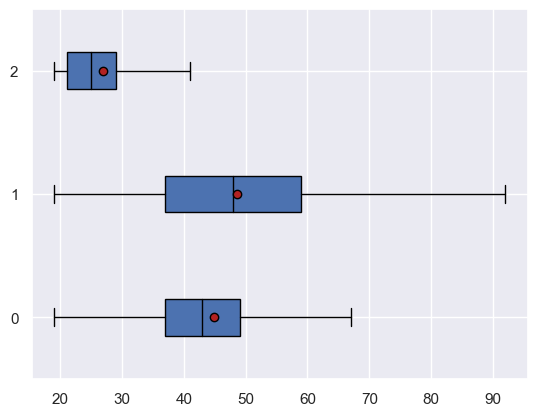

In [78]:
#Visualiser la tendance centrale (médiane et moyenne: point rouge), la dispersion (IQR)
Y = "age" # quantitative
X = "categ" # qualitative
modalites = ptc[X].unique()
groupes = []
for m in modalites:
    groupes.append(ptc[ptc[X]==m][Y])
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}  
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [79]:
#Vérifier l’égalité des variances,
alpha = 0.05

# Données à tester 
data = ptc['age']

# Effectuer les tests de normalité
shapiro_test = stats.shapiro(data)
ks_test = stats.kstest(data, 'norm')
ad_test = stats.anderson(data, dist='norm')
dagostino_test = stats.normaltest(data)
lilliefors_test = lilliefors(data)

# Créer un tableau pandas avec les résultats des tests
test_results = pd.DataFrame({
    'Nom du test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'Statistique de test': [shapiro_test.statistic, ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-valeur': [shapiro_test.pvalue, ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normalité': ['Oui' if shapiro_test.pvalue > alpha else 'Non',
                  'Oui' if ks_test.pvalue > alpha else 'Non',
                  'Oui' if ad_test.statistic < ad_test.critical_values[2] else 'Non',  # Utilisation du seuil alpha=0.05 (2ème position)
                  'Oui' if dagostino_test.pvalue > alpha else 'Non',
                  'Oui' if lilliefors_test[1] > alpha else 'Non']
})
print(test_results)

C:\Users\roulh\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


          Nom du test  Statistique de test  p-valeur Normalité
0        Shapiro-Wilk             0.971944     0.000       Non
1  Kolmogorov-Smirnov             1.000000     0.000       Non
2    Anderson-Darling          5221.182887       NaN       Non
3  D'Agostino-Pearson         33775.066292     0.000       Non
4          Lilliefors             0.080175     0.001       Non


In [80]:
# Exemple de régression linéaire pour modéliser l'âge en fonction de la catégorie de livre
X = sm.add_constant(ptc['categ'])  # Ajouter une constante pour l'intercept
model = sm.OLS(ptc['age'], X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4499.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:37:20   Log-Likelihood:            -2.5923e+06
No. Observations:              640734   AIC:                         5.185e+06
Df Residuals:                  640732   BIC:                         5.185e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.0837      0.022   2127.874      0.0

In [81]:
# Divisez les données en trois groupes en fonction des catégories.
groupe_1 = ptc[ptc['categ'] == 0]['age']
groupe_2 = ptc[ptc['categ'] == 1]['age']
groupe_3 =ptc[ptc['categ'] == 2]['age']

# Effectuez le test de Levene pour comparer les variances entre les groupes.

statistique_levene, valeur_p = levene(groupe_1, groupe_2, groupe_3)

# Affichez le résultat du test.

if valeur_p > 0.05:
    print("Il n'y a pas de différence significative entre les variances des groupes.")
else:
    print("Il y a une différence significative entre au moins un groupe.")
    print(f"La valeur de p est : {valeur_p}")



Il y a une différence significative entre au moins un groupe.
La valeur de p est : 0.0


Les différents tests indiquent toujours la non normalité des données.

Test d'Annova 

H0:Pas de relation entre age et catégorie 

H1:Il y a une corrélation entre l'age et la catégorie

In [82]:
# Utilisation de l'ANOVA pour comparer âge et catégories de livre
result_anova = f_oneway(groupe_1,groupe_2,groupe_3)

print("Statistique de test ANOVA:", result_anova.statistic)
print("P-value:", result_anova.pvalue)

alpha = 0.05

if result_anova.pvalue < alpha:
    print("Rejet H0: faire un test non paramétrique.")
else:
    print("Il y a corrélation")


Statistique de test ANOVA: 39705.51969324279
P-value: 0.0
Rejet H0: faire un test non paramétrique.


In [83]:
#"test d'homogénéité des variances" pour savoir si notre distribution des données suit la loi normale
data = ptc['age']
# Appliquer le test de Jarque-Bera
jb_statistic, p_value = stats.jarque_bera(data)

# Afficher les résultats
print("Statistique de Jarque-Bera :", jb_statistic)
print("P-value :", p_value)

# Interprétation des résultats
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Les données ne suivent pas une distribution normale (rejet de l'hypothèse nulle).")
else:
    print("Les données suivent une distribution normale (l'hypothèse nulle n'est pas rejetée).")


Statistique de Jarque-Bera : 39466.02972964907
P-value : 0.0
Les données ne suivent pas une distribution normale (rejet de l'hypothèse nulle).


Test de Kruskal

H0 (Hypothèse nulle) : Les distributions d'âge sont égales entre les différentes catégories.

H1 (Hypothèse alternative) : Les distributions d'âge ne sont pas égales entre au moins deux catégories.

In [84]:
# Utilisation d'un test non parametrique de Kruskal Wallis 
# Créez des sous-groupes d'âges pour chaque catégorie
categories = ptc['categ'].unique()  # Liste des catégories uniques
age_by_category = [ptc[ptc['categ'] == cat]['age'] for cat in categories]

# Appliquez le test de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(*age_by_category)

# Affichez les résultats
print("Statistique de Kruskal-Wallis :", h_statistic)
print("P-value :", p_value)

# Interprétation des résultats
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Il y a des différences significatives entre au moins deux catégories (rejet de l'hypothèse nulle).")
else:
    print("Il n'y a pas de différences significatives entre les catégories (l'hypothèse nulle n'est pas rejetée).")

Statistique de Kruskal-Wallis : 71359.73412120914
P-value : 0.0
Il y a des différences significatives entre au moins deux catégories (rejet de l'hypothèse nulle).


OUI l'âge varie de manière significative en fonction des catégories il existe une corrélation cependant ceci n'indique pas forcément un lien causal.


Merci de Votre attention.